**Andrew Renninger**

asrenninger

# Assignment 3

**Due date: Thursday 10/8, 6pm**

This assignment will contain two parts:

1. Exploring evictions and code violations in Philadelphia
2. Comparing the NDVI in Philadelphia

## Part 1: Exploring Evictions and Code Violations in Philadelphia

In this assignment, we'll explore spatial trends evictions in Philadelphia using data from the [Eviction Lab](https://evictionlab.org/) and building code violations using data from [OpenDataPhilly](https://www.opendataphilly.org/).

We'll be exploring the idea that evictions can occur as retaliation against renters for reporting code violations. Spatial correlations between evictions and code violations from the City's Licenses and Inspections department can offer some insight into this question. 

**A couple of interesting background readings:**
- [HuffPost article](https://www.huffingtonpost.com/entry/cities-are-starting-to-pay-attention-to-the-eviction-crisis-thats-devastated-poor-tenants_us_5b1a7b21e4b0bbb7a0dbd59e)
- [PlanPhilly article](http://planphilly.com/articles/2018/04/12/philly-landlords-evict-more-people-than-owners-in-other-large-cities)

## 1.1 Explore Eviction Lab Data

The Eviction Lab built the first national database for evictions. If you aren't familiar with the project, you can explore their website: https://evictionlab.org/ 

### 1.1.1 Read data using `geopandas`

The first step is to read the eviction data by census tract using `geopandas`. The data for all of Pennsylvania by census tract can be downloaded in a GeoJSON format using the following url:

https://eviction-lab-data-downloads.s3.amazonaws.com/PA/tracts.geojson

A browser-friendly version of the data is available here: https://data-downloads.evictionlab.org/

In [1]:
import pandas as pd
import geopandas as gpd
import holoviews as hv
import geoviews as gv

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
tracts = gpd.read_file("https://eviction-lab-data-downloads.s3.amazonaws.com/PA/tracts.geojson")

### 1.1.2 Explore and trim the data 

We will need to trim data to Philadelphia only. Take a look at the data dictionary for the descriptions of the various columns: https://eviction-lab-data-downloads.s3.amazonaws.com/DATA_DICTIONARY.txt

**Note:** the column names are shortened — see the end of the above file for the abbreviations. The numbers at the end of the columns indicate the years. For example, `e-16` is the number of evictions in 2016. 

Take a look at the individual columns and trim to census tracts in Philadelphia. (Hint: Philadelphia is both a city and a county).

In [3]:
tracts = tracts[tracts['GEOID'].str[:5]=="42101"]
tracts = tracts.drop(labels=['west', 'south', 'east', 'north', 'n', 'pl'], axis=1)

tracts.head()

GEOID     p-00  pr-00  roh-00  pro-00  mgr-00   mhi-00    mpv-00  \
435  42101000100  2646.71   9.26  1347.0   77.12   959.0  48886.0  189700.0   
436  42101000200  1362.00  56.42   374.0   81.48   421.0   8349.0   55600.0   
437  42101000300  2570.00  12.16   861.0   69.49   688.0  40625.0  233900.0   
438  42101000801  1478.00  14.40   810.0   73.65   933.0  42346.0  265200.0   
439  42101000804  3301.00  14.40  2058.0   73.65   933.0  42346.0  265200.0   

     rb-00  pw-00  ...  pm-16  po-16  ef-16  e-16  er-16  efr-16  lf-16  \
435   24.5  78.45  ...   2.49   0.00   25.0  16.0   0.93    1.45    0.0   
436   31.2  11.16  ...   2.27   0.00   11.0   8.0   0.95    1.30    0.0   
437   29.0  70.86  ...   1.76   0.00   26.0  14.0   0.73    1.35    0.0   
438   27.6  81.67  ...   1.42   3.78   13.0   4.0   0.51    1.64    0.0   
439   27.6  81.67  ...   0.19   0.35   22.0   7.0   0.33    1.04    0.0   

     imputed-16  subbed-16                                           geometry  
435         0.0        1.0  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...  
436         0.0        1.0  MULTIPOLYGON (((-75.15122 39.95686, -75.15167 ...  
437         0.0        1.0  MULTIPOLYGON (((-75.16234 39.95782, -75.16237 ...  
438         0.0        1.0  MULTIPOLYGON (((-75.17732 39.95096, -75.17784 ...  
439         0.0        1.0  MULTIPOLYGON (((-75.17118 39.94778, -75.17102 ...  

[5 rows x 393 columns]

### 1.1.3 Transform from wide to tidy format

For this assignment, we are interested in the number of evictions by census tract for various years. Right now, each year has it's own column, so it will be easiest to transform to a tidy format. 

Use the `pd.melt()` function to transform the eviction data into tidy format, using the number of evictions from **2003 to 2016**.

The tidy data frame should have four columns: `GEOID`, `geometry`, a column holding the number of evictions, and a column telling you what the name of the original column was for that value.

**Hints:**
- You'll want to specify the `GEOID` and `geometry` columns as the `id_vars`. This will keep track of the census tract information. 
- You should specify the names of the columns holding the number of evictions as the `value_vars`.
- You can generate a list of this column names using [Python's string formatting]:(https://docs.python.org/3.7/library/string.html#format-examples)
    ```python
    value_vars = ['e-{:02d}'.format(x) for x in range(3, 17)]
    ```

In [4]:
evrate = pd.melt(tracts, id_vars=['GEOID', 'geometry'], value_vars=['e-{:02d}'.format(x) for x in range(3, 17)])

evrate.head()

GEOID                                           geometry variable  \
0  42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...     e-03   
1  42101000200  MULTIPOLYGON (((-75.15122 39.95686, -75.15167 ...     e-03   
2  42101000300  MULTIPOLYGON (((-75.16234 39.95782, -75.16237 ...     e-03   
3  42101000801  MULTIPOLYGON (((-75.17732 39.95096, -75.17784 ...     e-03   
4  42101000804  MULTIPOLYGON (((-75.17118 39.94778, -75.17102 ...     e-03   

   value  
0   21.0  
1    3.0  
2   17.0  
3   13.0  
4   21.0

### 1.1.4 Plot the total number of evictions per year from 2003 to 2016

Use `hvplot` to plot the total number of evictions from 2003 to 2016. You will first need to perform a group by operation and sum up the total number of evictions for all census tracts, and then use `hvplot()` to make your plot.

You can use any type of `hvplot` chart you'd like to show the trend in number of evictions over time.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
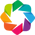

In [5]:
import hvplot.pandas

hv.extension("bokeh")

In [6]:
series = evrate.groupby('variable', as_index=False).value.sum()
series['year'] = series.variable.str.replace("e-", "").astype('int') + 2000

series.head()

variable    value  year
0     e-03  10647.0  2003
1     e-04  10491.0  2004
2     e-05  10550.0  2005
3     e-06  11078.0  2006
4     e-07  11032.0  2007

In [7]:
series.hvplot.step(x='year', y='value', c='#000095', value_label='evictions',
                   height=400, width=800)

:Curve   [year]   (value)

In [8]:
evrate['year'] = evrate.variable.str.replace("e-", "").astype('int') + 2000 

evrate[['year', 'value', 'GEOID']].hvplot.step(x="year", y="value", c='#000095', value_label='evictions',
                                               groupby="GEOID", widget_location='bottom', height=400, width=800)


Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='GEOID', options=['42101000100', ...], value='42101000100', width=250)
        [2] HSpacer()

### 1.1.5 The number of evictions across Philadelphia

Our tidy data frame is still a GeoDataFrame with a geometry column, so we can visualize the number of evictions for all census tracts. 

Use `hvplot()` to generate a choropleth showing the number of evictions for a specified year, with a widget dropdown to select a given year (or variable name, e.g., `e-16`, `e-15`, etc). 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select between them.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [9]:
evrate = evrate[['year', 'value', 'GEOID','geometry']].to_crs('epsg:4326')

evrate.head()

year  value        GEOID                                           geometry
0  2003   21.0  42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...
1  2003    3.0  42101000200  MULTIPOLYGON (((-75.15122 39.95686, -75.15167 ...
2  2003   17.0  42101000300  MULTIPOLYGON (((-75.16234 39.95782, -75.16237 ...
3  2003   13.0  42101000801  MULTIPOLYGON (((-75.17732 39.95096, -75.17784 ...
4  2003   21.0  42101000804  MULTIPOLYGON (((-75.17118 39.94778, -75.17102 ...

In [10]:
evrate.hvplot.polygons(c='value',
                       frame_width=600,
                       frame_height=600,
                       geo=True,
                       dynamic=False,
                       groupby='year',
                       widget_location='bottom',
                       cmap='jet')

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


Column
    [0] HoloViews(HoloMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(formatter='%d', margin=(20, 20, 20, 20), name='year', options=OrderedDict([('2003', ...]), value=2003, width=250)
        [2] HSpacer()

## 1.2 Code Violations in Philadelphia

Next, we'll explore data for code violations from the Licenses and Inspections Department of Philadelphia to look for potential correlations with the number of evictions.


### 1.2.1 Load data from 2012 to 2016

L+I violation data for years including 2012 through 2016 (inclusive) is provided in a CSV format in the "data/" folder. 

Load the data using pandas and convert to a GeoDataFrame.

In [11]:
vios = pd.read_csv("https://raw.githubusercontent.com/MUSA-550-Fall-2020/assignment-3/master/data/li_violations.csv")
vios = gpd.GeoDataFrame(vios, geometry=gpd.points_from_xy(vios.lng, vios.lat), crs=4326)

vios.head()

lat        lng            violationdescription  \
0  40.050526 -75.126076           CLIP VIOLATION NOTICE   
1  40.050593 -75.126578       LICENSE-CHANGE OF ADDRESS   
2  40.050593 -75.126578             LICENSE-RES SFD/2FD   
3  39.991994 -75.128895        EXT A-CLEAN WEEDS/PLANTS   
4  40.023260 -75.164848  EXT A-VACANT LOT CLEAN/MAINTAI   

                     geometry  
0  POINT (-75.12608 40.05053)  
1  POINT (-75.12658 40.05059)  
2  POINT (-75.12658 40.05059)  
3  POINT (-75.12889 39.99199)  
4  POINT (-75.16485 40.02326)

### 1.2.2 Trim to specific violation types

There are many different types of code violations (running the `nunique()` function on the `violationdescription` column will extract all of the unique ones). More information on different types of violations can be found [on the City's website](https://www.phila.gov/li/codesandregulations/Pages/codes.aspx).

Below, I've selected 15 types of violations that deal with property maintenance and licensing issues. We'll focus on these violations. The goal is to see if these kinds of violations are correlated spatially with the number of evictions in a given area. 

Use the list of violations given to trim your data set to only include these types.

In [12]:
violation_types = [
    "INT-PLMBG MAINT FIXTURES-RES",
    "INT S-CEILING REPAIR/MAINT SAN",
    "PLUMBING SYSTEMS-GENERAL",
    "CO DETECTOR NEEDED",
    "INTERIOR SURFACES",
    "EXT S-ROOF REPAIR",
    "ELEC-RECEPTABLE DEFECTIVE-RES",
    "INT S-FLOOR REPAIR",
    "DRAINAGE-MAIN DRAIN REPAIR-RES",
    "DRAINAGE-DOWNSPOUT REPR/REPLC",
    "LIGHT FIXTURE DEFECTIVE-RES",
    "LICENSE-RES SFD/2FD",
    "ELECTRICAL -HAZARD",
    "VACANT PROPERTIES-GENERAL",
    "INT-PLMBG FIXTURES-RES",
]

In [13]:
vios = vios[vios['violationdescription'].isin(violation_types)]

### 1.2.3 Make a hex bin map

The code violation data is **point data**. We can get a quick look at the geographic distribution using `matplotlib` and the `hexbin()` function. Make a hex bin map of the code violations and overlay the census tract outlines. 

**Hints**:
- The eviction data from part 1 was by census tract, so the census tract geometries are available as part of that GeoDataFrame. You can use it to overlay the census tracts on your hex bin map.
- Make sure you convert your GeoDataFrame to a CRS that's better for visualization than plain old 4326.

In [14]:
%matplotlib inline

import contextily as cx

from h3 import h3
from shapely.geometry import Polygon

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.


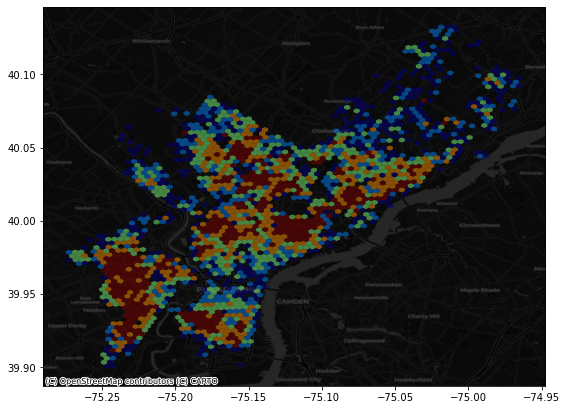

In [15]:
ZOOM = 9

e, s, w, n = vios.describe().loc[['min', 'max'], ['lng', 'lat']].values.flatten()

bbox = {'type': 'Polygon',
        'coordinates': (((e, s), (w, s), (w, n), (e, n), (e, s)), )}

hexs = h3.polyfill(bbox, 
                   ZOOM, 
                   geo_json_conformant=True)

shaper = lambda hex_id: Polygon(h3.h3_to_geo_boundary(hex_id, geo_json=True))

pols = gpd.GeoSeries(list(map(shaper, hexs)), index=hexs, crs={'init': 'epsg:4326'})

pols_hexs = gpd.GeoDataFrame({'h3hex': pols.index,
                              'geometry': pols},
                             crs=pols.crs).reset_index(drop=True)

h3fy = lambda r: h3.geo_to_h3(r['lat'], r['lng'], ZOOM)
vios['h3hex'] = vios[['lat', 'lng']].apply(h3fy, axis=1)

vios_hexs = vios.groupby('h3hex').size()

pols_hexs = gpd.GeoDataFrame({'h3hex': pols.index,
                              'size': 0,
                              'geometry': pols},
                             crs=pols.crs)

pols_hexs['size'].update(vios_hexs)
pols_hexs = pols_hexs[pols_hexs['size'] != 0]

ax = pols_hexs.plot(column='size', 
                    scheme='quantiles', k=5,
                    cmap='jet',
                    alpha=0.5, figsize=(9, 9))

cx.add_basemap(ax, crs=pols.crs, 
               url=cx.providers.CartoDB.DarkMatter)

In [16]:
vios = vios.drop('h3hex', axis=1)

### 1.2.4 Spatially join data sets

To do a census tract comparison to our eviction data, we need to find which census tract each of the code violations falls into. Use the `geopandas.sjoin()` function to do just that. 


**Hints**
- You can re-use your eviction data frame, but you will only need the `geometry` column (specifying census tract polygons) and the `GEOID` column (specifying the name of each census tract).
- Make sure both data frames have the same CRS before joining them together!

In [26]:
joined = gpd.sjoin(vios, tracts[['GEOID', 'geometry']])

### 1.2.5 Calculate the number of violations by type per census tract

Next, we'll want to find the number of violations (for each kind) per census tract. You should group the data frame by violation type and census tract name.

The result of this step should be a data frame with three columns: `violationdescription`, `GEOID`, and `N`, where `N` is the number of violations of that kind in the specified census tract.

**Optional: to make prettier plots**

Some census tracts won't have any violations, and they won't be included when we do the above calculation. However, there is a trick to set the values for those census tracts to be zero. After you calculate the sizes of each violation/census tract group, you can run: 

```python
N = N.unstack(fill_value=0).stack().reset_index(name='N')
```
where `N` gives the total size of each of the groups, specified by violation type and census tract name.

See [this StackOverflow post](https://stackoverflow.com/questions/42854801/including-missing-combinations-of-values-in-a-pandas-groupby-aggregation) for more details.

This part is **optional**, but will make the resulting maps a bit prettier.

In [33]:
bytract = joined.groupby(
    ['GEOID', 'violationdescription']
                        ).violationdescription.count().unstack(fill_value=0).stack().reset_index(name='N')

### 1.2.6 Merge with census tracts geometries

We now have the number of violations of different types per census tract specified as a regular DataFrame. You can now merge it with the census tract geometries (from your eviction data GeoDataFrame) to create a GeoDataFrame. 

**Hints**
- Use `pandas.merge()` and specify the `on` keyword to be the column holding census tract names. 
- Make sure the result of the merge operation is a GeoDataFrame — you will want the GeoDataFrame holding census tract geometries to be the first argument of the `pandas.merge()` function.

In [40]:
joined = bytract.merge(tracts[['GEOID', 'geometry']], 
                       how='left',
                       left_on='GEOID',
                       right_on='GEOID')

joined = gpd.GeoDataFrame(joined)

### 1.2.7 Interactive choropleths for each violation type

Now, we can use `hvplot()` to create an interactive choropleth for each violation type and add a widget to specify different violation types. 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select different violation types.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [48]:
joined['description'] = joined['violationdescription']

joined.hvplot.polygons(c='N',
                       frame_width=600,
                       frame_height=600,
                       geo=True,
                       dynamic=False,
                       groupby='description',
                       widget_location='bottom',
                       title="Prevelance of Violations by Census Tract",
                       cmap='jet')

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


Column
    [0] HoloViews(HoloMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='description', options=['CO DETECTOR NEEDED', ...], value='CO DETECTOR NEEDED', width=250)
        [2] HSpacer()

## 1.3. A side-by-side comparison

From the interactive maps of evictions and violations, you should notice a lot of spatial overlap. 

As a final step, we'll make a side-by-side comparison to better show the spatial correlations. This will involve a few steps: 

1. Trim the data frame plotted in section 1.1.5 to only include evictions from 2016. 
2. Trim the data frame plotted in section 1.2.7 to only include a single violation type (pick whichever one you want!).
3. Use `hvplot()` to make two interactive choropleth maps, one for the data from step 1. and one for the data in step 2.
4. Show these two plots side by side (one row and 2 columns) using the syntax for combining charts.

**Note:** since we selected a single year and violation type, you won't need to use the `groupby=` keyword here.

In [54]:
l1 = "Evictions in 2016 by Census Tract"

p1 = evrate[evrate['year']==2016].hvplot.polygons(c='value',
                                                  frame_width=300,
                                                  frame_height=300,
                                                  geo=True,
                                                  title=l1,
                                                  dynamic=False,
                                                  cmap='jet')

l2 = "Electrical Hazard by Census Tract"

p2 = joined[joined['description']=='ELECTRICAL -HAZARD'].hvplot.polygons(c='N',
                                                                         frame_width=300,
                                                                         frame_height=300,
                                                                         geo=True,
                                                                         title=l2,
                                                                         dynamic=False,
                                                                         cmap='jet')

p1 + p2

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (value)
   .Polygons.II :Polygons   [Longitude,Latitude]   (N)

## 1.4. Extra Credit

Identify the 20 most common types of violations within the time period of 2012 to 2016 and create a set of interactive choropleths similar to what was done in section 1.2.7. 

Use this set of maps to identify 3 types of violations that don't seem to have much spatial overlap with the number of evictions in the City.

In [73]:
vios = pd.read_csv("https://raw.githubusercontent.com/MUSA-550-Fall-2020/assignment-3/master/data/li_violations.csv")
vios = gpd.GeoDataFrame(vios, geometry=gpd.points_from_xy(vios.lng, vios.lat), crs=4326)

aggregates = vios.groupby('violationdescription', as_index=False).size()
aggregates['rank'] = aggregates['size'].rank(ascending=False)

aggregates = pd.DataFrame(aggregates)

top20 = aggregates[aggregates['rank']<21]

In [94]:
joined = gpd.sjoin(vios[vios['violationdescription'].isin(top20['violationdescription'])], 
                   tracts[['GEOID', 'geometry']])

joined = joined.groupby(
    ['GEOID', 'violationdescription']
                        ).violationdescription.count().unstack(fill_value=0).stack().reset_index(name='N')


In [95]:
joined = joined.merge(tracts[['GEOID', 'geometry']], 
                      how='left',
                      left_on='GEOID',
                      right_on='GEOID')

joined = gpd.GeoDataFrame(joined)

In [103]:
joined['description'] = joined['violationdescription']

joined.hvplot.polygons(c='N',
                       groupby='description',
                       frame_width=600,
                       frame_height=600,
                       geo=True,
                       dynamic=False,
                      # subplots=True,
                       widget_location='bottom',
                       title="Prevelance of Violations by Census Tract",
                       cmap='jet')

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not
/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


Column
    [0] HoloViews(HoloMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='description', options=['ANNUAL CERT FIRE ALARM',...], value='ANNUAL CERT FIRE ALARM', width=250)
        [2] HSpacer()

It looks like C&I violations are concentrated in Center City, which are not where evictions occur for the most part. fire alarm violations are also prevalanet in Center City and University City, though some also co-occur with evictions.

## Part 2: Exploring the NDVI in Philadelphia

In this part, we'll explore the NDVI in Philadelphia a bit more. This part will include two parts:

1. We'll compare the median NDVI within the city limits and the immediate suburbs
1. We'll calculate the  NDVI around street trees in the city.

## 2.1 Comparing the NDVI in the city and the suburbs

### 2.1.1 Load Landsat data for Philadelphia

Use rasterio to load the landsat data for Philadelphia (available in the "data/" folder)

In [140]:
import rasterio as rio

landsat = rio.open("https://github.com/MUSA-550-Fall-2020/assignment-3/raw/master/data/landsat8_philly.tif")

### 2.1.2 Separating the city from the suburbs

Create two polygon objects, one for the city limits and one for the suburbs. To calculate the suburbs polygon, we will take everything outside the city limits but still within the bounding box. 

* The city limits are available in the "data/" folder.
* To calculate the suburbs polygon, the "envelope" attribute of the city limits geometry will be useful.
* You can use geopandas' [geometric manipulation](http://geopandas.org/geometric_manipulations.html#examples-of-geometric-manipulations) functionality to calculate the suburbs polygon from the city limits polygon and the envelope polygon.

In [145]:
city = gpd.read_file("https://raw.githubusercontent.com/MUSA-550-Fall-2020/assignment-3/master/data/City_Limits.geojson")
subs = city.envelope.difference(city)

city = city.to_crs('epsg:32618')
subs = subs.to_crs('epsg:32618')

### 2.1.3 Mask and calculate the NDVI for the city and the suburbs

Using the two polygons from the last section, use rasterio's mask functionality to create two masked arrays from the landsat data, one for the city and one for the suburbs. 

For each masked array, calculate the NDVI.

In [147]:
from rasterio.mask import mask

urbmask, urbmask_transform = mask(
    dataset=landsat,
    shapes=city.geometry,
    crop=True,  # remove pixels not within boundary
    all_touched=True,  # get all pixels that touch the boudnary
    filled=False,  # do not fill cropped pixels with a default value
)

submask, surbmask_transform = mask(
    dataset=landsat,
    shapes=subs.geometry,
    crop=True,  # remove pixels not within boundary
    all_touched=True,  # get all pixels that touch the boudnary
    filled=False,  # do not fill cropped pixels with a default value
)

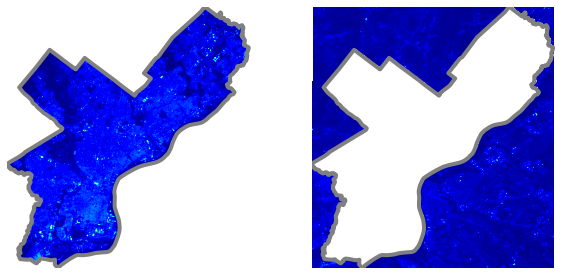

In [152]:
landsat_extent = [
    landsat.bounds.left,
    landsat.bounds.right,
    landsat.bounds.bottom,
    landsat.bounds.top,
]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(urbmask[0], cmap="jet", extent=landsat_extent)

city.boundary.plot(ax=axs[0], color="gray", linewidth=4)

axs[1].imshow(submask[0], cmap="jet", extent=landsat_extent)

city.boundary.plot(ax=axs[1], color="gray", linewidth=4)

axs[0].set_axis_off()
axs[1].set_axis_off()

In [155]:
def ndvi(nir, red):

    nir = nir.astype(float)
    red = red.astype(float)
    
    check = np.logical_and( red.mask == False, nir.mask == False )
    
    ndvi = np.where(check,  (nir - red ) / ( nir + red ), np.nan )
    return ndvi 

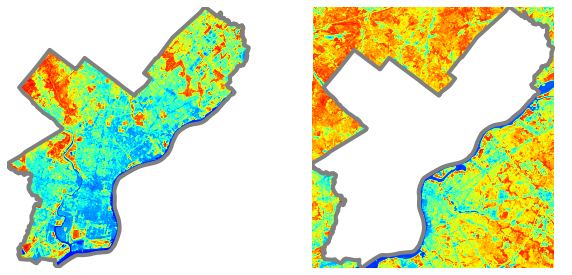

In [157]:
import numpy as np

red = urbmask[3]
nir = urbmask[4]

urb_veg = ndvi(nir, red)

red = submask[3]
nir = submask[4]

sub_veg = ndvi(nir, red)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(urb_veg, cmap="jet", extent=landsat_extent)

city.boundary.plot(ax=axs[0], color="gray", linewidth=4)

axs[1].imshow(sub_veg, cmap="jet", extent=landsat_extent)

city.boundary.plot(ax=axs[1], color="gray", linewidth=4)

axs[0].set_axis_off()
axs[1].set_axis_off()

### 2.1.4 Calculate the median NDVI within the city and within the suburbs

* Calculate the median value from your NDVI arrays for the city and suburbs
* Numpy's `nanmedian` function will be useful for ignoring NaN elements
* Print out the median values. Which has a higher NDVI: the city or suburbs?

In [159]:
print(np.nanmedian(urb_veg))
print(np.nanmedian(sub_veg))

0.20268593532493442
0.37466958688920776


Who would have guessed—the suburbs won. 

## 2.2 Calculating the NDVI for Philadelphia's street treets

### 2.2.1 Load the street tree data

The data is available in the "data/" folder. It has been downloaded from [OpenDataPhilly](https://www.opendataphilly.org/dataset/ppr-tree-canopy). It contains the locations of abot 2,500 street trees in Philadelphia.

In [164]:
trees = gpd.read_file("https://raw.githubusercontent.com/MUSA-550-Fall-2020/assignment-3/master/data/ppr_tree_canopy_points_2015.geojson").to_crs("epsg:32618")

### 2.2.2 Calculate the NDVI values at the locations of the street trees

* Use the rasterstats package to calculate the NDVI values at the locations of the street trees.
* Since these are point geometries, you can calculate either the median or the mean statistic (only one pixel will contain each point).

In [165]:
from rasterstats import zonal_stats

stats = zonal_stats(trees, urb_veg, affine=landsat.transform, stats=['mean'])

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


### 2.2.3 Plotting the results

Make two plots of the results:

1. A histogram of the NDVI values, using matplotlib's `hist` function. Include a vertical line that marks the NDVI = 0 threshold
1. A plot of the street tree points, colored by the NDVI value, using geopandas' `plot` function. Include the city limits boundary on your plot.

The figures should be clear and well-styled, with for example, labels for axes, legends, and clear color choices. 

Text(0.5, 0.98, 'NDVI Values at Philadelphia Street Trees')

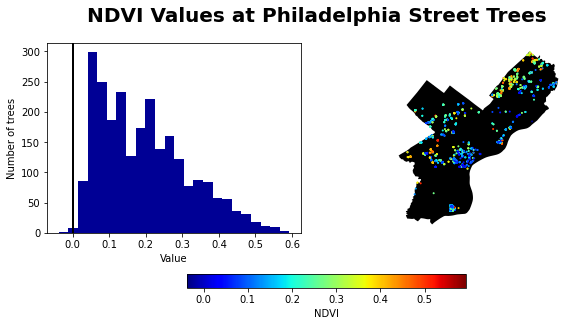

In [187]:
trees['ndvi'] = [s['mean'] for s in stats] 

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].hist(trees['ndvi'], bins='auto', color='#000095')
axs[0].axvline(x=0, color='#000000', lw=2)

axs[0].set_xlabel("Value", fontsize=10)
axs[0].set_ylabel("Number of trees", fontsize=10);

city.plot(color='#000000', ax=axs[1])

trees.plot('ndvi', ax=axs[1], cmap='jet', markersize=1)

patch_col = axs[1].collections[1]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.5, label='NDVI', orientation="horizontal")

axs[1].set_axis_off()

fig.suptitle('NDVI Values at Philadelphia Street Trees', size=20, weight='bold')